# Example 03: Sequential Optimization.

In this example, skZemax API is used to:
- Load the file made in `Example 01: Set-up and Quick-Focus (Sequential)`
    - A copy of this file will be saved as a new skZemax example file.
- Set specific properties of the system to be variable.
- Setup merit functions to determine how the system will be optimized.
- Run a local optimization, followed by a Hammer optimization.
    - A local optimization is a "quick" optimization based on the merit functions.
    - A Hammer optimization helps the design to escape local minima in the merit function.
- Study the changes in optical prescription 

#### Load the System and Save a copy

In [1]:
from __future__ import annotations

import os

from skZemax.skZemaxClass import skZemaxClass

skZemax = skZemaxClass()
# Open file
skZemax.Utilities_OpenZemaxFile(
    skZemax.Utilities_skZemaxExampleDir() + os.sep + r"e01_new_file_and_quickfocus.zmx",
    False,
)
# Make a copy of it with different name
skZemax.Utilities_SaveZemaxFileAs(
    skZemax.Utilities_skZemaxExampleDir() + os.sep + r"e03_open_file_and_optimize.zmx"
)

OpenZemaxFile ::  Opening Zemax file [E:\_OfficerRepositories\ZemaxRepos\skZemax\docs\source\Examples\e01_new_file_and_quickfocus.zmx].
SaveZemaxFileAs :: Saving Current Zemax File As [E:\_OfficerRepositories\ZemaxRepos\skZemax\docs\source\Examples\e03_open_file_and_optimize.zmx].


#### Get the initial state
For comparison purposes only, getting the initial prescription and 2D cross section.

In [ ]:
skZemax.Visualization_SEQ_2DCrossSection(
    save_image=True,
    saved_image_location=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e03_open_file_and_optimize_initial_2DCrossSection.png",
)
init_prescription = skZemax.Analyses_ReportSystemPrescription(
    save_textfile_path=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e03_open_file_and_optimize_initial_Prescription.txt"
)

Analyses_RunAnalysesAndGetResults :: Running analysis [PrescriptionDataSettings] ...
Analyses_RunAnalysesAndGetResults :: Done.


['��System/Prescription Data',
 'File : E:\\_OfficerRepositories\\ZemaxRepos\\skZemax\\docs\\source\\Examples\\e03_open_file_and_optimize.zmx',
 'Title: ',
 'Date : 2026-02-23',
 'GENERAL LENS DATA:',
 'Surfaces                : \t               4',
 'Stop                    : \t               1',
 'System Aperture         : \tEntrance Pupil Diameter = \t40',
 'Fast Semi-Diameters     :\tOn ',
 'Field Unpolarized       :\tOn',
 'Convert thin film phase to ray equivalent :\tOn ',
 'J/E Conversion Method   :\tX Axis Reference  ',
 'Glass Catalogs          : \tSCHOTT SCHOTT_IRG ',
 'Ray Aiming              :\tOff',
 'Apodization             : \tUniform, factor = \t   0.00000E+00',
 'Reference OPD           :\tExit Pupil  ',
 'Paraxial Rays Setting   :\tIgnore Coordinate Breaks  ',
 'Method to Compute F/#   :\tTracing Rays  ',
 'Method to Compute Huygens Integral   : Auto',
 'Print Coordinate Breaks :\tOn',
 'Multi-Threading         :\tOn',
 'OPD Modulo 2 Pi         :\tOff',
 'Temperature 

#### Select what variables will be adjusted in the optimization.
In this example we will adjust:
- The `thickness` of surfaces `1, 2, and 3`.
- The `radius` of surface `2`.

In [3]:
skZemax.Solver_LDEMakeSurfacePropertyVariable(1, "thickness")
skZemax.Solver_LDEMakeSurfacePropertyVariable(2, "thickness")
skZemax.Solver_LDEMakeSurfacePropertyVariable(2, "radius")
skZemax.Solver_LDEMakeSurfacePropertyVariable(3, "thickness")

#### Setting up the merit functions

There are many operands for merit functions. Section `5.2.1.1. Optimization Operands Summary` of the Zemax help pdf file.
Yhis can be accessed from `[INSTALL PATH]\Ansys\OpticStudio_UserManual_en.pdf`, or by opening Zemax itself and navigating `Help -> Help PDF`.

Immediately below we optimize to eliminate (`target=0`) the aberrations of:
- `ASTI`:  The third order astigmatism calculated from the Seidel coefficients.
    - Reducing Astigmatism is prioritized over coma by the `weight` property.
- `COMA`:  The third order coma calculated from the Seidel coefficients

In [4]:
skZemax.MFE_SetOperand(
    in_Operand=skZemax.MFE_GetOperand(1), operand_type="ASTI", target=0.0, weight=10.0
)
skZemax.MFE_SetOperand(
    in_Operand=skZemax.MFE_InsertNewOperand(2),
    operand_type="COMA",
    target=0.0,
    weight=1.0,
)

Next we target air gap properties:
- `MNCA`: Minimum center thickness of air between surfaces `1 and 3` to be `0.5`.
- `MXCA`: Maximum center thickness of air between surfaces `1 and 3` to be `1000`.
- `MNEA`: Minimum edge thickness in air of all surfaces between `1 and 3` to be `0.5`

In [5]:
skZemax.MFE_SetOperand(
    in_Operand=skZemax.MFE_AddNewOperand(),
    operand_type="MNCA",
    target=0.5,
    weight=1.0,
    param1=1,
    param2=3,
)
skZemax.MFE_SetOperand(
    in_Operand=skZemax.MFE_AddNewOperand(),
    operand_type="MXCA",
    target=1000,
    weight=1.0,
    param1=1,
    param2=3,
)
skZemax.MFE_SetOperand(
    in_Operand=skZemax.MFE_AddNewOperand(),
    operand_type="MNEA",
    target=0.5,
    weight=1.0,
    param1=1,
    param2=3,
)

Next we target material gap properties:
- `MNCG`: Minimum center thickness glass between surfaces `1 and 3` to be `3.0`.
- `MXCG`: Maximum center thickness of glass between surfaces `1 and 3` to be `15.0`.
- `MNEG`: Minimum edge thickness in glass of all surfaces between `1 and 3` to be `3.0`

In [6]:
skZemax.MFE_SetOperand(
    in_Operand=skZemax.MFE_AddNewOperand(),
    operand_type="MNCG",
    target=3.0,
    weight=1.0,
    param1=1,
    param2=3,
)
skZemax.MFE_SetOperand(
    in_Operand=skZemax.MFE_AddNewOperand(),
    operand_type="MXCG",
    target=15.0,
    weight=1.0,
    param1=1,
    param2=3,
)
skZemax.MFE_SetOperand(
    in_Operand=skZemax.MFE_AddNewOperand(),
    operand_type="MNEG",
    target=3.0,
    weight=1.0,
    param1=1,
    param2=3,
)

#### Running the solves

First we run a local optimization. Then we follow it with a hammer solve limited to 10 seconds of run time.

In [7]:
# Local optimization till completion
skZemax.Solver_LocalOptimization()
# Hammer for 10 seconds
skZemax.Solver_HammerOptimization(secondsRunning=10.0)

Solver_LocalOptimization :: Running Local Optimization ...
Solver_LocalOptimization :: Done Local Optimization
Solver_HammerOptimization :: Running Hammer Optimization for [10.00] seconds ...
|████████████████████████████████████████| 100% in 10.2s (0.10%/s) 
Solver_HammerOptimization :: Done Hammer Optimization.


#### Save the optimized design.

In [8]:
skZemax.Utilities_SaveZemaxFile()

SaveZemaxFile :: Saving Current Zemax File.


## Comparing the system pre and post optimization

Displaying a 2D cross section of the initial system which was saved above before any optimization was done.

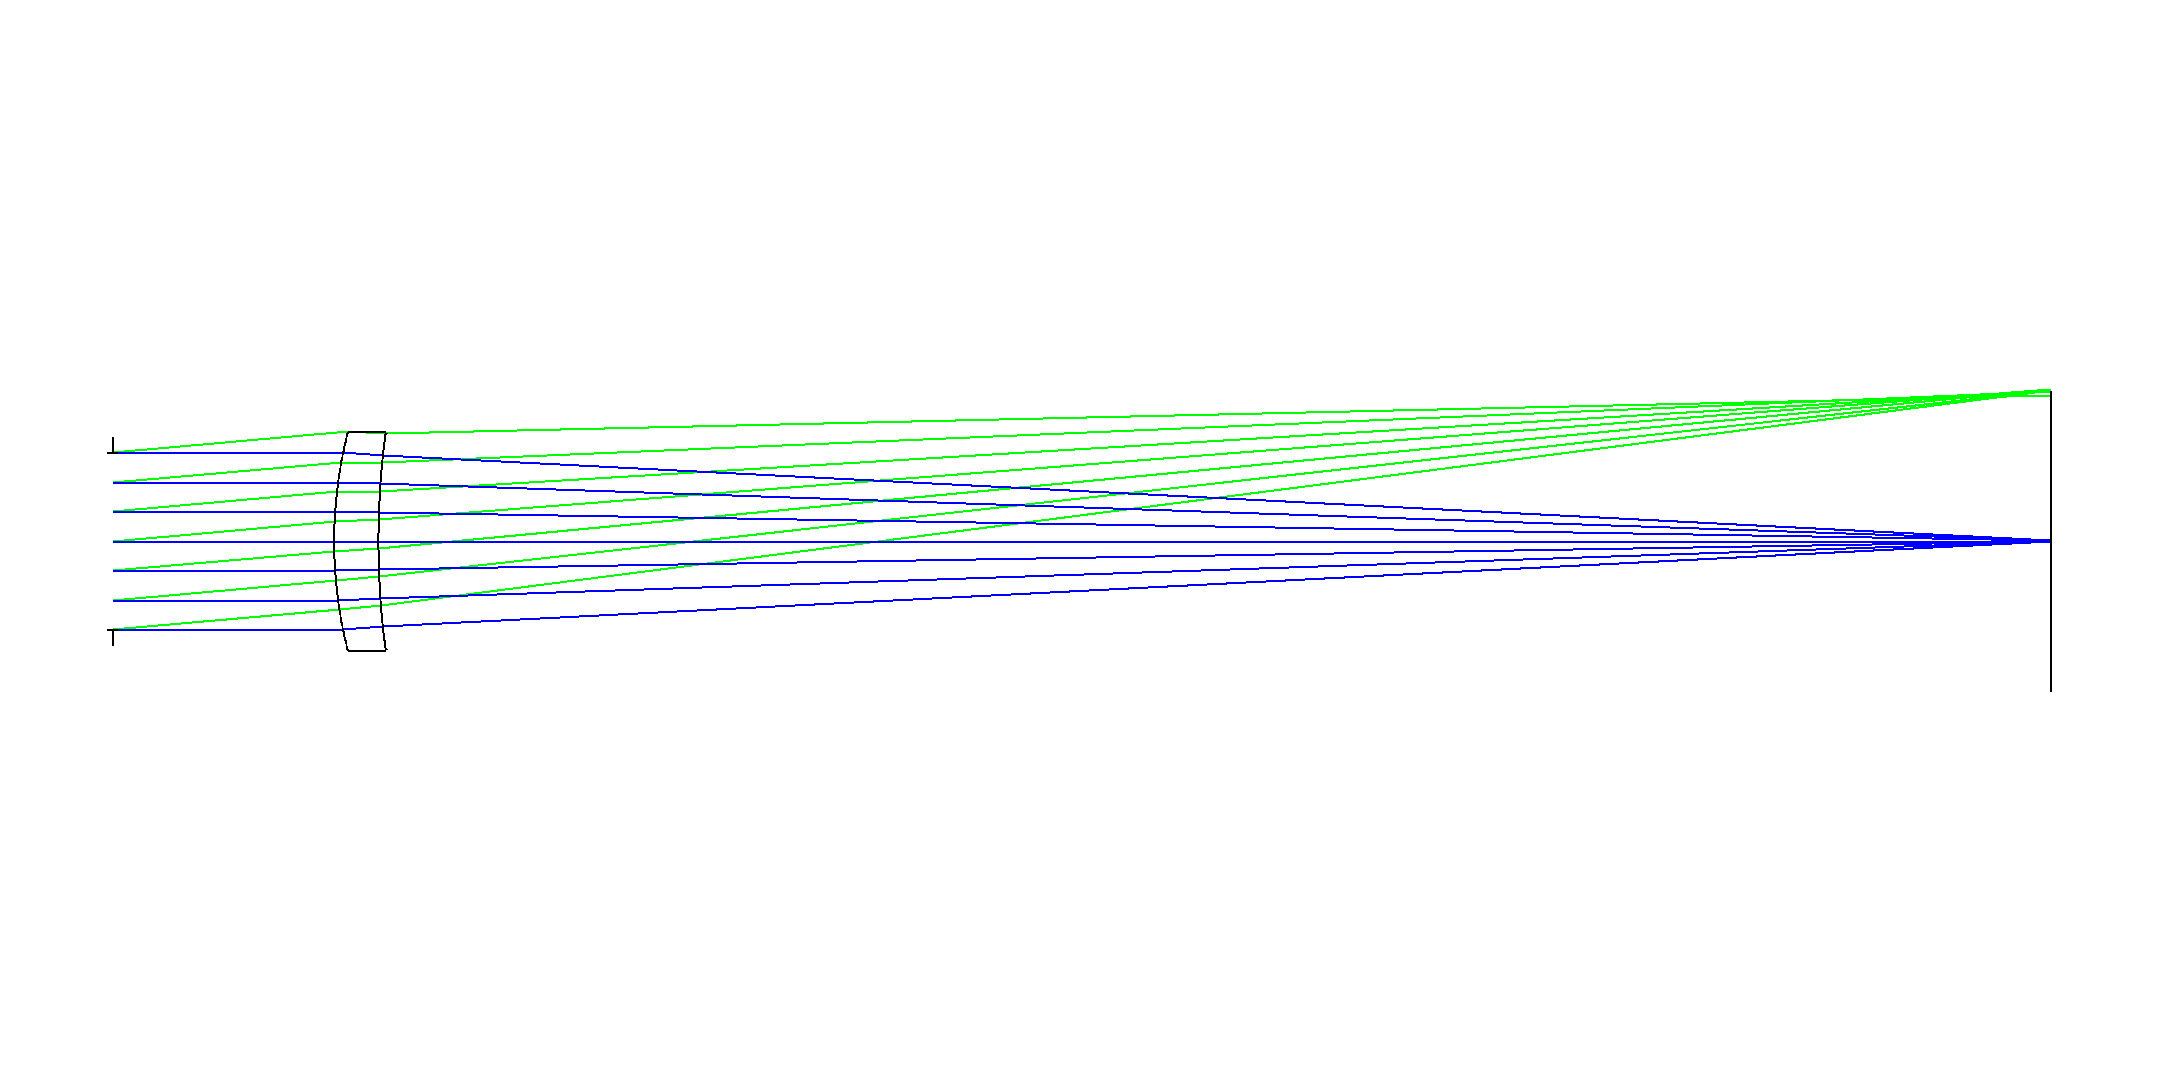

In [9]:
from IPython.display import Image

Image(
    skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e03_open_file_and_optimize_initial_2DCrossSection.png",
    width=800,
)

Now making and displaying a 2D cross section of the optimized system

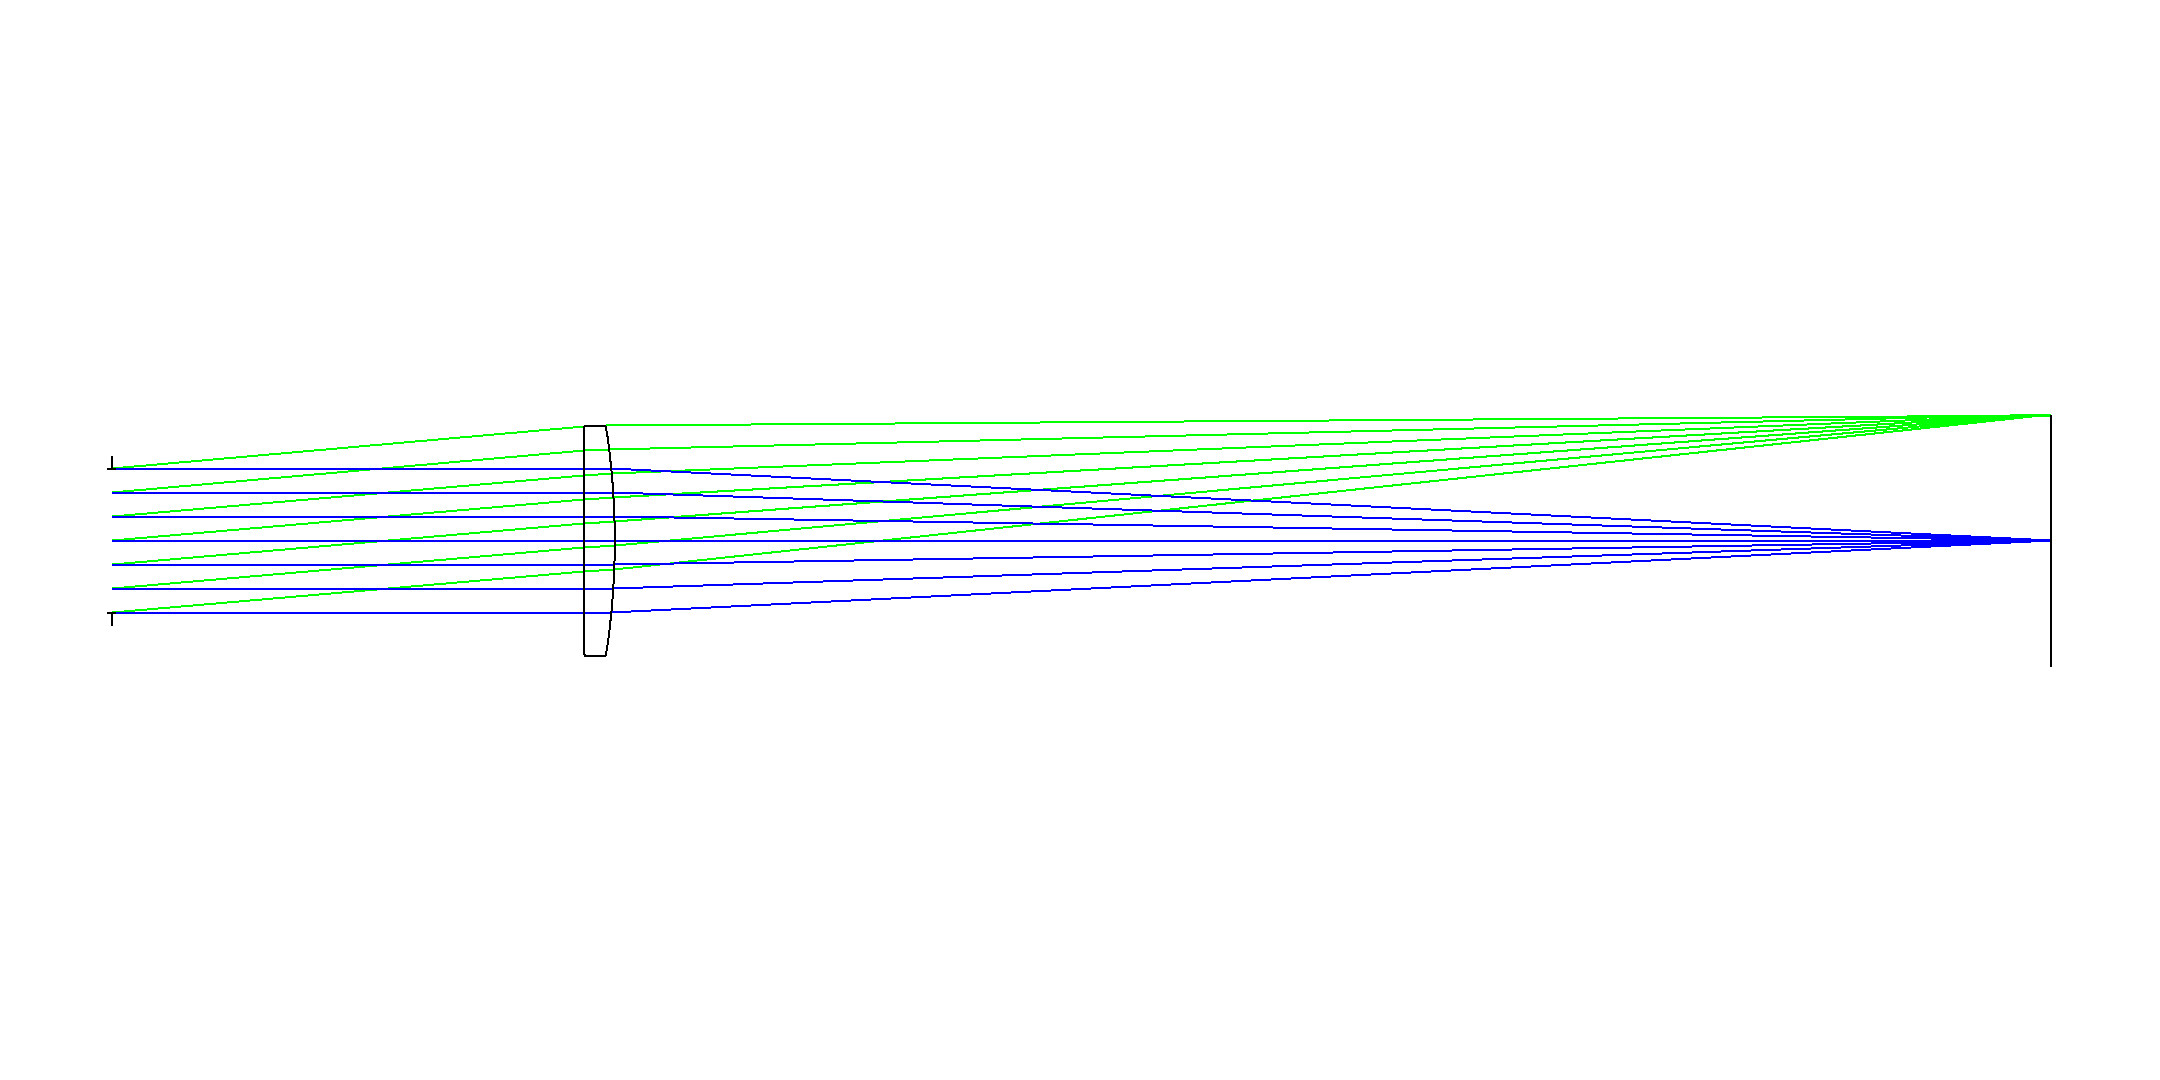

In [10]:
# Make and display the 2D view
skZemax.Visualization_SEQ_2DCrossSection(
    save_image=True,
    saved_image_location=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e03_open_file_and_optimize_2DCrossSection.png",
)
Image(
    filename=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e03_open_file_and_optimize_2DCrossSection.png",
    width=800,
)

The prescription information shows the specifics of what was done to the system's surfaces.

In [11]:
# Get the optimized prescription
optimized_prescription = skZemax.Analyses_ReportSystemPrescription(
    save_textfile_path=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e03_open_file_and_optimize_optimized_Prescription.txt"
)
# printing
print("INITIAL SURFACES:")
for line in skZemax.Analyses_ExtractSectionOfTextFile(
    in_file=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e03_open_file_and_optimize_initial_Prescription.txt",
    start_marker="SURFACE DATA SUMMARY:",
    end_marker="SURFACE DATA DETAIL:",
):
    print(line)
print("OPTIMIZED SURFACES:")
for line in skZemax.Analyses_ExtractSectionOfTextFile(
    in_file=optimized_prescription,
    start_marker="SURFACE DATA SUMMARY:",
    end_marker="SURFACE DATA DETAIL:",
):
    print(line)

Analyses_RunAnalysesAndGetResults :: Running analysis [PrescriptionDataSettings] ...
Analyses_RunAnalysesAndGetResults :: Done.
INITIAL SURFACES:
Surf       	Type        	Radius        	Thickness           	Glass      	  Clear Diam   	  Chip Zone  	  Mech Diam       	   Conic        	Comment
 OBJ	 STANDARD	       Infinity	       Infinity	                     	             0	             0	             0	              0	 
 STO	 STANDARD	       Infinity	             50	                     	            40	             0	            40	              0	 This is free to move.
   2	 STANDARD	            100	             10	                N-BK7	      49.28854	             0	      49.28854	              0	 Front of lens
   3	 STANDARD	       187.1033	       377.6094	                     	       48.7826	             0	      49.28854	              0	 Back of lens
 IMA	 STANDARD	       Infinity	               	                     	      67.94137	             0	      67.94137	              0	 
 

#### Close/Cleanup

In [12]:
del skZemax
skZemax = None